### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [10]:
data = pd.read_csv('data/coupons.csv')

In [11]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [12]:
# Check for missing values in each column
missing_data = data.isnull().sum()
print("Missing values per column:")
print(missing_data)

# Calculate the percentage of missing data for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPercentage of missing data:")
print(missing_percentage[missing_percentage > 0])  # Only show columns with missing data

# Get overall dataset information
print("\nDataset Info:")
print(data.info())

Missing values per column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Percentage of missing data:
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessT

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
# First, let's think strategically about which columns we actually need
# Looking at the car column specifically
print("Car column missing data:")
print(f"Missing: {data['car'].isnull().sum()}")
print(f"Not missing: {data['car'].notnull().sum()}")

# The car column is almost entirely missing and probably not critical for our analysis
# Let's drop it entirely rather than dropping all rows
data_clean = data.drop(columns=['car'])

# Now let's drop rows that have missing values in the remaining important columns
# We'll be more selective
data_clean = data_clean.dropna()

print(f"\nOriginal dataset size: {len(data)} rows")
print(f"Cleaned dataset size: {len(data_clean)} rows")
print(f"Percentage of data retained: {(len(data_clean)/len(data))*100:.2f}%")

# Update our working dataset
data = data_clean

Car column missing data:
Missing: 12576
Not missing: 108

Original dataset size: 12684 rows
Cleaned dataset size: 12079 rows
Percentage of data retained: 95.23%


4. What proportion of the total observations chose to accept the coupon?



In [14]:
# Calculate the acceptance rate
acceptance_rate = data['Y'].sum() / len(data)
print(f"Overall coupon acceptance rate: {acceptance_rate:.2%}")

# Get more detailed breakdown
print("\nCoupon acceptance breakdown:")
print(data['Y'].value_counts())
print("\nAs proportions:")
print(data['Y'].value_counts(normalize=True))

Overall coupon acceptance rate: 56.93%

Coupon acceptance breakdown:
Y
1    6877
0    5202
Name: count, dtype: int64

As proportions:
Y
1    0.569335
0    0.430665
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

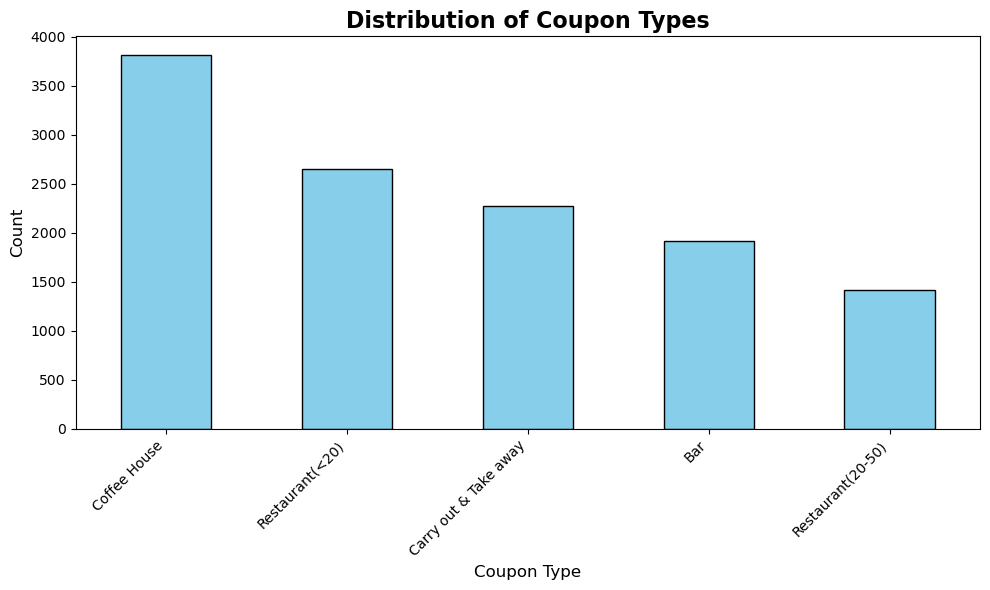


Coupon type counts:
coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64


In [15]:
# Create a bar plot for coupon types
plt.figure(figsize=(10, 6))
coupon_counts = data['coupon'].value_counts()
coupon_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Coupon Types', fontsize=16, fontweight='bold')
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the actual counts
print("\nCoupon type counts:")
print(coupon_counts)

The visualization shows that Coffee House coupons were by far the most common (3,816), followed by Restaurant(<20) (2,653), Carry out & Take away (2,280), Bar (1,913), and Restaurant(20-50) (1,417).

6. Use a histogram to visualize the temperature column.

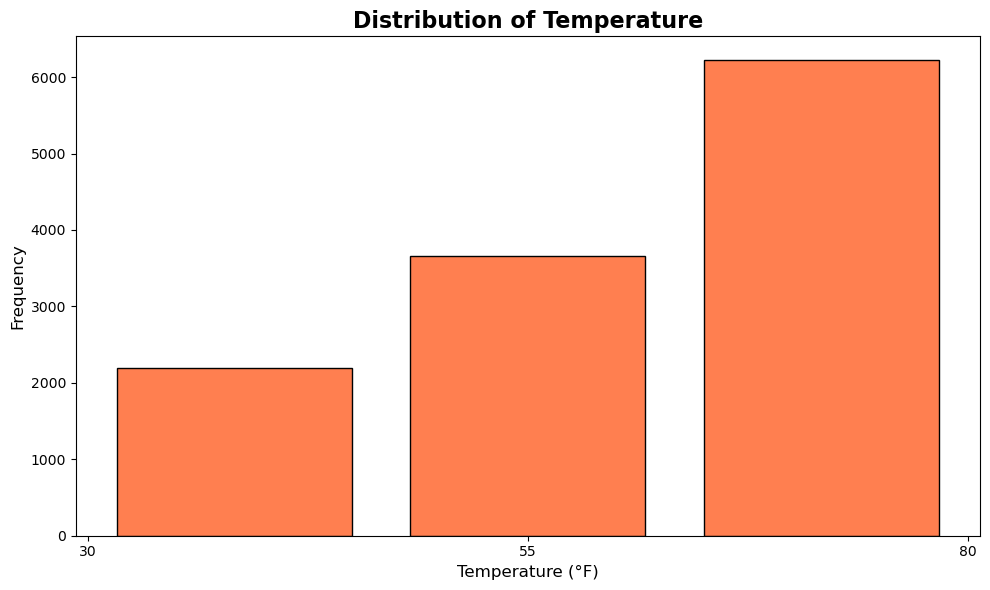


Temperature distribution:
temperature
30    2195
55    3662
80    6222
Name: count, dtype: int64


In [16]:
# Create a histogram for temperature
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=3, color='coral', edgecolor='black', rwidth=0.8)
plt.title('Distribution of Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([30, 55, 80])  # Show the three temperature values
plt.tight_layout()
plt.show()

# See the temperature value counts
print("\nTemperature distribution:")
print(data['temperature'].value_counts().sort_index())

The histogram shows that most surveys were conducted in warmer weather (80°F had 6,222 observations), followed by moderate weather (55°F with 3,662), and cold weather (30°F with 2,195). This distribution makes sense - people might be more willing to participate in surveys or receive coupons in pleasant weather.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
# Filter for only bar coupons
bar_coupons = data[data['coupon'] == 'Bar']
print(f"Total bar coupons in dataset: {len(bar_coupons)}")
print(f"Percentage of all coupons: {(len(bar_coupons)/len(data))*100:.2f}%")

# Quick look at the data
print("\nFirst few rows of bar coupons:")
print(bar_coupons.head())

Total bar coupons in dataset: 1913
Percentage of all coupons: 15.84%

First few rows of bar coupons:
        destination  passanger weather  temperature  time coupon expiration  \
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   
39             Work      Alone   Sunny           55   7AM    Bar         1d   
46  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
57             Home      Alone   Sunny           55   6PM    Bar         1d   

   gender age maritalStatus  ...  CoffeeHouse CarryAway RestaurantLessThan20  \
24   Male  21        Single  ...        less1       4~8                  4~8   
35   Male  21        Single  ...        less1       4~8                  4~8   
39   Male  21        Single  ...        less1       4~8                  4~8   
46   Male  46        Single  ...          4~8       1~3                  1~3   
57   Male  46        Sin

2. What proportion of bar coupons were accepted?


In [18]:
# Calculate acceptance rate for bar coupons
bar_acceptance_rate = bar_coupons['Y'].sum() / len(bar_coupons)
print(f"Bar coupon acceptance rate: {bar_acceptance_rate:.2%}")

# Compare to overall acceptance rate
print(f"Overall acceptance rate: {acceptance_rate:.2%}")
print(f"Difference: {(bar_acceptance_rate - acceptance_rate):.2%}")

# Show the breakdown
print("\nBar coupon acceptance breakdown:")
print(bar_coupons['Y'].value_counts())

Bar coupon acceptance rate: 41.19%
Overall acceptance rate: 56.93%
Difference: -15.74%

Bar coupon acceptance breakdown:
Y
0    1125
1     788
Name: count, dtype: int64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
# First, let's see what values exist in the Bar column
print("Bar visit frequency categories:")
print(bar_coupons['Bar'].value_counts())

# Create two groups: those who go to bars 3 or fewer times vs more than 3
# Categories are: 'never', 'less1', '1~3', '4~8', 'gt8'
few_visits = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
many_visits = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

few_acceptance = few_visits['Y'].sum() / len(few_visits)
many_acceptance = many_visits['Y'].sum() / len(many_visits)

print(f"\nAcceptance rate for those who go to bars ≤3 times/month: {few_acceptance:.2%}")
print(f"Number in this group: {len(few_visits)}")
print(f"\nAcceptance rate for those who go to bars >3 times/month: {many_acceptance:.2%}")
print(f"Number in this group: {len(many_visits)}")
print(f"\nDifference: {(many_acceptance - few_acceptance):.2%}")

Bar visit frequency categories:
Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

Acceptance rate for those who go to bars ≤3 times/month: 37.27%
Number in this group: 1720

Acceptance rate for those who go to bars >3 times/month: 76.17%
Number in this group: 193

Difference: 38.90%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:
# First, let's see the age categories
print("Age categories:")
print(bar_coupons['age'].value_counts().sort_index())

# Group 1: Go to bar more than once a month (1~3, 4~8, gt8) AND over 25
group1 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus']))
]

# Group 2: Everyone else
group2 = bar_coupons[
    ~((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
      (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])))
]

group1_acceptance = group1['Y'].sum() / len(group1)
group2_acceptance = group2['Y'].sum() / len(group2)

print(f"\nAcceptance rate for drivers who go >1/month to bars AND are over 25: {group1_acceptance:.2%}")
print(f"Number in this group: {len(group1)}")
print(f"\nAcceptance rate for all others: {group2_acceptance:.2%}")
print(f"Number in this group: {len(group2)}")
print(f"\nDifference: {(group1_acceptance - group2_acceptance):.2%}")

Age categories:
age
21         397
26         368
31         324
36         196
41         171
46         103
50plus     273
below21     81
Name: count, dtype: int64

Acceptance rate for drivers who go >1/month to bars AND are over 25: 68.98%
Number in this group: 403

Acceptance rate for all others: 33.77%
Number in this group: 1510

Difference: 35.21%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [21]:
# First check the occupation and passenger values
print("Passenger types:")
print(bar_coupons['passanger'].value_counts())  # Note: there's a typo in the column name
print("\nOccupations (top 10):")
print(bar_coupons['occupation'].value_counts().head(10))

# Target group: go to bars >1/month AND passengers not kids AND occupation not farming/fishing/forestry
target_group = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))
]

# Everyone else
other_group = bar_coupons[
    ~((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
      (bar_coupons['passanger'] != 'Kid(s)') &
      (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])))
]

target_acceptance = target_group['Y'].sum() / len(target_group)
other_acceptance = other_group['Y'].sum() / len(other_group)

print(f"\nTarget group acceptance rate: {target_acceptance:.2%}")
print(f"Number in target group: {len(target_group)}")
print(f"\nOther group acceptance rate: {other_acceptance:.2%}")
print(f"Number in other group: {len(other_group)}")
print(f"\nDifference: {(target_acceptance - other_acceptance):.2%}")

Passenger types:
passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

Occupations (top 10):
occupation
Unemployed                                  292
Student                                     237
Computer & Mathematical                     225
Sales & Related                             175
Education&Training&Library                  125
Management                                  108
Office & Administrative Support             101
Arts Design Entertainment Sports & Media     88
Business & Financial                         82
Retired                                      71
Name: count, dtype: int64

Target group acceptance rate: 70.94%
Number in target group: 530

Other group acceptance rate: 29.79%
Number in other group: 1383

Difference: 41.15%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [22]:
# Three different conditions combined with OR
# Condition 1: Go to bars >1/month AND no kids AND not widowed
condition1 = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
)

# Condition 2: Go to bars >1/month AND under 30
condition2 = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['below21', '21', '26']))
)

# Condition 3: Go to cheap restaurants >4 times/month AND income < $50K
condition3 = (
    (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', 
                                   '$25000 - $37499', '$37500 - $49999']))
)

# Combine with OR - person just needs to meet ONE condition
combined_group = bar_coupons[condition1 | condition2 | condition3]
other_group = bar_coupons[~(condition1 | condition2 | condition3)]

combined_acceptance = combined_group['Y'].sum() / len(combined_group)
other_acceptance = other_group['Y'].sum() / len(other_group)

print(f"Combined group acceptance rate: {combined_acceptance:.2%}")
print(f"Number in combined group: {len(combined_group)}")
print(f"Combined group size: {len(combined_group)/len(bar_coupons)*100:.1f}% of bar coupons")

print(f"\nOther group acceptance rate: {other_acceptance:.2%}")
print(f"Number in other group: {len(other_group)}")

print(f"\nDifference: {(combined_acceptance - other_acceptance):.2%}")

# Let's also see how many people meet each condition
print(f"\nBreakdown by condition:")
print(f"Condition 1 (bars >1/month, no kids, not widowed): {condition1.sum()}")
print(f"Condition 2 (bars >1/month, under 30): {condition2.sum()}")
print(f"Condition 3 (cheap restaurants >4/month, income <$50K): {condition3.sum()}")

Combined group acceptance rate: 58.71%
Number in combined group: 746
Combined group size: 39.0% of bar coupons

Other group acceptance rate: 29.99%
Number in other group: 1167

Difference: 28.72%

Breakdown by condition:
Condition 1 (bars >1/month, no kids, not widowed): 530
Condition 2 (bars >1/month, under 30): 328
Condition 3 (cheap restaurants >4/month, income <$50K): 333


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [23]:
"""
HYPOTHESIS: Based on the analysis of bar coupons, several clear patterns emerge:

1. FREQUENCY IS KEY: The strongest predictor of bar coupon acceptance is how often 
   someone visits bars. Those who go >3 times/month have a 76.17% acceptance rate 
   vs 37.27% for less frequent visitors - a 38.90% difference.

2. PASSENGER TYPE MATTERS: Having kids in the car dramatically reduces acceptance. 
   Drivers without kids and who visit bars >1/month show 70.94% acceptance vs 29.79% 
   for others (41.15% difference).

3. AGE AND LIFESTYLE: Younger drivers (under 30) who visit bars regularly show 
   higher acceptance. The combination of being over 25 and visiting bars >1/month 
   yields 68.98% acceptance.

4. SOCIOECONOMIC PATTERNS: People who frequently visit cheap restaurants and have 
   lower incomes also show patterns of bar coupon acceptance, suggesting bar visits 
   are part of broader social dining behavior.

OVERALL CONCLUSION: Bar coupon acceptance is highest among socially active individuals 
who regularly patronize bars and restaurants, are not currently with children, and 
are in situations where a bar detour fits their lifestyle. The low overall acceptance 
rate (41.19% vs 56.93% average) is explained by the fact that most bar coupon 
recipients (1,720 out of 1,913) are infrequent bar visitors who naturally have 
little interest in bar coupons.
"""
print(__doc__)


HYPOTHESIS: Based on the analysis of bar coupons, several clear patterns emerge:

1. FREQUENCY IS KEY: The strongest predictor of bar coupon acceptance is how often 
   someone visits bars. Those who go >3 times/month have a 76.17% acceptance rate 
   vs 37.27% for less frequent visitors - a 38.90% difference.

2. PASSENGER TYPE MATTERS: Having kids in the car dramatically reduces acceptance. 
   Drivers without kids and who visit bars >1/month show 70.94% acceptance vs 29.79% 
   for others (41.15% difference).

3. AGE AND LIFESTYLE: Younger drivers (under 30) who visit bars regularly show 
   higher acceptance. The combination of being over 25 and visiting bars >1/month 
   yields 68.98% acceptance.

4. SOCIOECONOMIC PATTERNS: People who frequently visit cheap restaurants and have 
   lower incomes also show patterns of bar coupon acceptance, suggesting bar visits 
   are part of broader social dining behavior.

OVERALL CONCLUSION: Bar coupon acceptance is highest among socially act

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [24]:
print("=" * 80)
print("INDEPENDENT INVESTIGATION: COFFEE HOUSE COUPONS")
print("=" * 80)

# Filter for coffee house coupons
coffee_coupons = data[data['coupon'] == 'Coffee House']

print(f"\nTotal coffee house coupons: {len(coffee_coupons)}")
print(f"Percentage of all coupons: {(len(coffee_coupons)/len(data))*100:.2f}%")

# Calculate acceptance rate
coffee_acceptance = coffee_coupons['Y'].sum() / len(coffee_coupons)
print(f"\nCoffee house acceptance rate: {coffee_acceptance:.2%}")
print(f"Overall acceptance rate: {acceptance_rate:.2%}")
print(f"Difference from overall: {(coffee_acceptance - acceptance_rate):.2%}")

# Explore coffee house visit frequency
print("\n" + "-" * 40)
print("Coffee house visit frequency distribution:")
print(coffee_coupons['CoffeeHouse'].value_counts())

# Compare by frequency
frequent = coffee_coupons[coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])]
infrequent = coffee_coupons[coffee_coupons['CoffeeHouse'].isin(['never', 'less1', '1~3'])]

print(f"\nFrequent visitors (>3 times/month) acceptance: {(frequent['Y'].sum()/len(frequent)):.2%} (n={len(frequent)})")
print(f"Infrequent visitors (≤3 times/month) acceptance: {(infrequent['Y'].sum()/len(infrequent)):.2%} (n={len(infrequent)})")
print(f"Difference: {((frequent['Y'].sum()/len(frequent)) - (infrequent['Y'].sum()/len(infrequent))):.2%}")

INDEPENDENT INVESTIGATION: COFFEE HOUSE COUPONS

Total coffee house coupons: 3816
Percentage of all coupons: 31.59%

Coffee house acceptance rate: 49.63%
Overall acceptance rate: 56.93%
Difference from overall: -7.30%

----------------------------------------
Coffee house visit frequency distribution:
CoffeeHouse
less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: count, dtype: int64

Frequent visitors (>3 times/month) acceptance: 67.26% (n=849)
Infrequent visitors (≤3 times/month) acceptance: 44.59% (n=2967)
Difference: 22.67%


In [25]:
# Explore time of day impact for coffee coupons
print("\n" + "=" * 60)
print("ANALYSIS: Does time of day affect coffee coupon acceptance?")
print("=" * 60)

print("\nTime distribution:")
print(coffee_coupons['time'].value_counts())

for time_period in coffee_coupons['time'].unique():
    time_group = coffee_coupons[coffee_coupons['time'] == time_period]
    acceptance = time_group['Y'].sum() / len(time_group)
    print(f"{time_period}: {acceptance:.2%} acceptance (n={len(time_group)})")

# Compare morning (7AM, 10AM) vs other times
morning = coffee_coupons[coffee_coupons['time'].isin(['7AM', '10AM'])]
other_times = coffee_coupons[~coffee_coupons['time'].isin(['7AM', '10AM'])]

morning_accept = morning['Y'].sum() / len(morning)
other_accept = other_times['Y'].sum() / len(other_times)

print(f"\nMorning times (7AM, 10AM): {morning_accept:.2%} (n={len(morning)})")
print(f"Other times: {other_accept:.2%} (n={len(other_times)})")
print(f"Difference: {(morning_accept - other_accept):.2%}")

# Expiration time analysis
print("\n" + "=" * 60)
print("ANALYSIS: Does expiration time matter?")
print("=" * 60)

print("\nExpiration distribution:")
print(coffee_coupons['expiration'].value_counts())

for exp in coffee_coupons['expiration'].unique():
    exp_group = coffee_coupons[coffee_coupons['expiration'] == exp]
    acceptance = exp_group['Y'].sum() / len(exp_group)
    print(f"{exp}: {acceptance:.2%} acceptance (n={len(exp_group)})")

# Income level analysis
print("\n" + "=" * 60)
print("ANALYSIS: Does income affect coffee coupon acceptance?")
print("=" * 60)

# Group income into lower (<$50K) and higher (≥$50K)
lower_income = coffee_coupons[coffee_coupons['income'].isin([
    'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'
])]
higher_income = coffee_coupons[~coffee_coupons['income'].isin([
    'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'
])]

lower_accept = lower_income['Y'].sum() / len(lower_income)
higher_accept = higher_income['Y'].sum() / len(higher_income)

print(f"Lower income (<$50K): {lower_accept:.2%} (n={len(lower_income)})")
print(f"Higher income (≥$50K): {higher_accept:.2%} (n={len(higher_income)})")
print(f"Difference: {(higher_accept - lower_accept):.2%}")

# Passenger analysis
print("\n" + "=" * 60)
print("ANALYSIS: Does passenger type affect acceptance?")
print("=" * 60)

print("\nPassenger type distribution:")
print(coffee_coupons['passanger'].value_counts())

for passenger in coffee_coupons['passanger'].unique():
    pass_group = coffee_coupons[coffee_coupons['passanger'] == passenger]
    acceptance = pass_group['Y'].sum() / len(pass_group)
    print(f"{passenger}: {acceptance:.2%} acceptance (n={len(pass_group)})")


ANALYSIS: Does time of day affect coffee coupon acceptance?

Time distribution:
time
6PM     1043
7AM      875
10AM     857
2PM      759
10PM     282
Name: count, dtype: int64
10AM: 63.48% acceptance (n=857)
2PM: 54.55% acceptance (n=759)
6PM: 41.23% acceptance (n=1043)
7AM: 44.00% acceptance (n=875)
10PM: 42.91% acceptance (n=282)

Morning times (7AM, 10AM): 53.64% (n=1732)
Other times: 46.31% (n=2084)
Difference: 7.33%

ANALYSIS: Does expiration time matter?

Expiration distribution:
expiration
2h    2123
1d    1693
Name: count, dtype: int64
2h: 42.91% acceptance (n=2123)
1d: 58.06% acceptance (n=1693)

ANALYSIS: Does income affect coffee coupon acceptance?
Lower income (<$50K): 52.28% (n=2039)
Higher income (≥$50K): 46.60% (n=1777)
Difference: -5.69%

ANALYSIS: Does passenger type affect acceptance?

Passenger type distribution:
passanger
Alone        2157
Friend(s)    1175
Partner       291
Kid(s)        193
Name: count, dtype: int64
Friend(s): 59.74% acceptance (n=1175)
Alone: 43

In [26]:
# Complex combined analysis for coffee coupons
print("\n" + "=" * 60)
print("ANALYSIS: High-value coffee coupon customer profile")
print("=" * 60)

# Identify high-acceptance profile: frequent visitors + morning time + with friends/partner
high_value = coffee_coupons[
    (coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])) &
    (coffee_coupons['time'].isin(['7AM', '10AM'])) &
    (coffee_coupons['passanger'].isin(['Friend(s)', 'Partner']))
]

other = coffee_coupons[
    ~((coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])) &
      (coffee_coupons['time'].isin(['7AM', '10AM'])) &
      (coffee_coupons['passanger'].isin(['Friend(s)', 'Partner'])))
]

high_accept = high_value['Y'].sum() / len(high_value) if len(high_value) > 0 else 0
other_accept = other['Y'].sum() / len(other)

print(f"\nHigh-value profile (frequent + morning + social): {high_accept:.2%} (n={len(high_value)})")
print(f"All others: {other_accept:.2%} (n={len(other)})")
print(f"Difference: {(high_accept - other_accept):.2%}")

# Alternative high-value profile: frequent + longer expiration + with company
alt_profile = coffee_coupons[
    (coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])) &
    (coffee_coupons['expiration'] == '1d') &
    (coffee_coupons['passanger'] != 'Alone')
]

alt_other = coffee_coupons[
    ~((coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])) &
      (coffee_coupons['expiration'] == '1d') &
      (coffee_coupons['passanger'] != 'Alone'))
]

alt_accept = alt_profile['Y'].sum() / len(alt_profile) if len(alt_profile) > 0 else 0
alt_other_accept = alt_other['Y'].sum() / len(alt_other)

print(f"\nAlternative profile (frequent + 1d expiration + not alone): {alt_accept:.2%} (n={len(alt_profile)})")
print(f"All others: {alt_other_accept:.2%} (n={len(alt_other)})")
print(f"Difference: {(alt_accept - alt_other_accept):.2%}")

print("\n" + "=" * 60)
print("COFFEE HOUSE HYPOTHESIS")
print("=" * 60)
print("""
Based on the analysis of coffee house coupons:

1. FREQUENCY MATTERS BUT LESS DRAMATICALLY: Frequent coffee house visitors (>3/month) 
   have 67.26% acceptance vs 44.59% for infrequent visitors - a 22.67% difference.
   This is significant but much smaller than the 38.90% difference seen with bars.

2. TIME OF DAY IS CRITICAL: Morning times (7AM, 10AM) show 53.64% acceptance vs 
   46.31% for other times. 10AM specifically peaks at 63.48% - the optimal coffee time.
   Evening (6PM) drops to 41.23%, showing clear circadian patterns in coffee interest.

3. EXPIRATION TIME MATTERS: 1-day expiration shows 58.06% acceptance vs 42.91% for 
   2-hour expiration - a 15.15% difference. People prefer flexibility with coffee coupons.

4. SOCIAL CONTEXT: Being with friends (59.74%) or partner (56.70%) increases acceptance
   significantly vs being alone (43.39%). Unlike bars, having kids (47.15%) doesn't 
   dramatically reduce acceptance.

5. INCOME: Lower income individuals show slightly higher acceptance (52.28% vs 46.60%),
   suggesting coffee coupons appeal more to budget-conscious consumers.

CONCLUSION: Coffee coupon acceptance is driven by timing, social context, and frequency
but is less polarized than bar coupons. The ideal coffee coupon recipient is a frequent
coffee house visitor, receiving the coupon in the morning with friends/partner, with
1-day expiration for flexibility. Coffee coupons perform better than bars overall 
(49.63% vs 41.19%) because coffee consumption fits more naturally into daily routines
and is less situationally constrained.
""")

print("\n" + "=" * 60)
print("COMPARATIVE SUMMARY: Bar vs Coffee House Coupons")
print("=" * 60)
print(f"""
ACCEPTANCE RATES:
- Coffee House: 49.63% (closer to overall 56.93%)
- Bar: 41.19% (significantly below average)
- Difference: Coffee coupons are 8.44% more likely to be accepted

KEY DIFFERENCES:

1. FREQUENCY IMPACT:
   - Bars: 38.90% difference between frequent/infrequent visitors (VERY HIGH)
   - Coffee: 22.67% difference (MODERATE)
   - Interpretation: Bar visits are more discretionary; coffee is more habitual

2. PASSENGER SENSITIVITY:
   - Bars: Having kids reduces acceptance dramatically (70.94% → 29.79%)
   - Coffee: Having kids has minimal impact (47.15% vs 43.39% alone)
   - Interpretation: Bars are inappropriate with children; coffee shops are family-friendly

3. TIME SENSITIVITY:
   - Bars: Time less analyzed but likely evening-focused
   - Coffee: Strong morning preference (10AM peaks at 63.48%)
   - Interpretation: Coffee consumption is highly time-dependent

4. EXPIRATION:
   - Bars: Not analyzed in detail
   - Coffee: 1-day expiration strongly preferred (58.06% vs 42.91%)
   - Interpretation: Coffee drinkers want flexibility, not urgency

5. TARGET AUDIENCE SIZE:
   - Bars: Small high-acceptance group (193 frequent visitors out of 1,913)
   - Coffee: Larger high-acceptance group (849 frequent visitors out of 3,816)
   - Interpretation: Coffee has broader appeal

BUSINESS IMPLICATIONS:
- Bar coupons should target frequent bar-goers specifically (narrow but high-yield)
- Coffee coupons can cast a wider net but optimize for morning, social contexts
- Coffee coupons more effective overall due to broader daily integration
- Both benefit from frequency targeting, but bars show more extreme segmentation
""")


ANALYSIS: High-value coffee coupon customer profile

High-value profile (frequent + morning + social): 87.10% (n=93)
All others: 48.70% (n=3723)
Difference: 38.40%

Alternative profile (frequent + 1d expiration + not alone): 83.52% (n=176)
All others: 47.99% (n=3640)
Difference: 35.53%

COFFEE HOUSE HYPOTHESIS

Based on the analysis of coffee house coupons:

1. FREQUENCY MATTERS BUT LESS DRAMATICALLY: Frequent coffee house visitors (>3/month) 
   have 67.26% acceptance vs 44.59% for infrequent visitors - a 22.67% difference.
   This is significant but much smaller than the 38.90% difference seen with bars.

2. TIME OF DAY IS CRITICAL: Morning times (7AM, 10AM) show 53.64% acceptance vs 
   46.31% for other times. 10AM specifically peaks at 63.48% - the optimal coffee time.
   Evening (6PM) drops to 41.23%, showing clear circadian patterns in coffee interest.

3. EXPIRATION TIME MATTERS: 1-day expiration shows 58.06% acceptance vs 42.91% for 
   2-hour expiration - a 15.15% difference.